In [1]:
import scipy.io as sio
import scipy
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import time
from numpy import genfromtxt
from tensorflow.keras import layers
import random

In [44]:
def plotprediction3d(true, predict1,predict2,predict3, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2))
    axesf = axes.flatten()
    plt.tight_layout()
    for i in range(ncols*nrows):
        ax1 = axesf[i]
        if i < predict1.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 2, label='Observation')
            if i < 4:
                
                #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
                #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5)
                
                ax1.plot(np.arange(0, nstep,frequency),predict1[:int(nstep/frequency),i],color='orange',linestyle = '-',marker = None,markersize = 5,label='RNN Training')
                ax1.plot(np.arange(nstep,predict1.shape[0]*frequency,frequency),predict1[int(nstep/frequency):,i],color='orange',linestyle = '--',marker = None,markersize = 5,label='RNN Prediction')
                ax1.plot(np.arange(0, nstep,frequency),predict2[:int(nstep/frequency),i],color='Blue',linestyle = '-',marker = None,markersize = 5,label='CNN Training')
                ax1.plot(np.arange(nstep,predict1.shape[0]*frequency,frequency),predict2[int(nstep/frequency):,i],color='Blue',linestyle = '--',marker = None,markersize = 5,label='CNN Prediction')
                ax1.plot(np.arange(0, nstep,frequency),predict3[:int(nstep/frequency),i],color='Green',linestyle = '-',marker = None,markersize = 5,label='CNN-RNN Training')
                ax1.plot(np.arange(nstep,predict1.shape[0]*frequency,frequency),predict3[int(nstep/frequency):,i],color='Green',linestyle = '--',marker = None,markersize = 5,label='CNN-RNN Prediction')
            elif i == 4:
                print(1)
                ax1.scatter(np.arange(0, nstep,frequency),predict1[:int(nstep/frequency),i],
                         color='orange',marker = 'o',s = 2, alpha = 0.5,label='RNN Training')
                ax1.scatter(np.arange(nstep,predict1.shape[0]*frequency,frequency),
                         predict1[int(nstep/frequency):,i], color='orange',marker = 'o',s = 1,label='RNN Prediction')
                ax1.scatter(np.arange(0, nstep,frequency),predict2[:int(nstep/frequency),i],
                         color='blue',marker = 'o',s = 2,alpha = 0.4,label='CNN Training')
                ax1.scatter(np.arange(nstep,predict2.shape[0]*frequency,frequency),
                         predict2[int(nstep/frequency):,i],color='blue',marker = 'o',s = 1,label='CNN Prediction')
                ax1.scatter(np.arange(0, nstep,frequency),predict3[:int(nstep/frequency),i],
                         color='green',marker = 'o',s = 2,alpha = 0.4,label='CNN-RNN Training')
                ax1.scatter(np.arange(nstep,predict3.shape[0]*frequency,frequency),
                         predict3[int(nstep/frequency):,i],color='green',marker = 'o',s = 1,label='CNN-RNN Prediction')
            
            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.set_xlim([-70,480])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.legend(loc=2,fontsize = 8)
            ax1.set_ylim([-0.05,1.05])
            ax1.set_title('Test' + str(i+1), fontsize = 13)
        else:
            ax1.axis('off')
def plotpredictiond(true, train1, predict1, train2, predict2, train3, predict3, nstep, frequency, nrows,ncols): 
    #print(np.round(np.sqrt(np.mean((true-predict0)**2)),3))
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2))
    plt.ylim(0,1)
    axesf = axes.flatten()
    plt.tight_layout()
    for i in range(ncols*nrows):
        ax1 = axesf[i]
        if i < predict1.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5)
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 2, label='Observation')
            if i != 4:
                
                ax1.plot(np.arange(0, nstep,frequency),train1[:int(nstep/frequency),i],color='orange',linestyle = '-',marker = None,markersize = 5,label='RNN Training')
                ax1.plot(np.arange(nstep,nstep+predict1.shape[0]*frequency,frequency),predict1[:,i],color='orange',linestyle = '--',marker = None,markersize = 5,label='RNN Prediction')
                ax1.plot(np.arange(0, nstep,frequency),train2[:int(nstep/frequency),i],color='blue',linestyle = '-',marker = None,markersize = 5,label='CNN Training')
                ax1.plot(np.arange(nstep,nstep+predict1.shape[0]*frequency,frequency),predict2[:,i],color='blue',linestyle = '--',marker = None,markersize = 5,label='CNN Prediction')
                ax1.plot(np.arange(0, nstep,frequency),train3[:int(nstep/frequency),i],color='green',linestyle = '-',marker = None,markersize = 5,label='CNN-RNN Training')
                ax1.plot(np.arange(nstep,nstep+predict1.shape[0]*frequency,frequency),predict3[:,i],color='green',linestyle = '--',marker = None,markersize = 5,label='CNN-RNN Prediction')
                #err = np.round(np.sqrt(np.mean((true[:,i]-predict0[:,i])**2)),3)
                
            else:
                
                ax1.scatter(np.arange(0, nstep,frequency),train1[:int(nstep/frequency),i],
                            color='orange',marker = 'o',s = 2,alpha = 0.5,label='RNN Training')
                ax1.scatter(np.arange(nstep,nstep+predict1.shape[0]*frequency,frequency),
                            predict1[:,i],color='orange',marker = 'o',s =1,label='RNN Prediction')
                ax1.scatter(np.arange(0, nstep,frequency),train2[:int(nstep/frequency),i],
                            color='blue',marker = 'o',s = 2,alpha = 0.4,label='CNN Training')
                ax1.scatter(np.arange(nstep,nstep+predict2.shape[0]*frequency,frequency),
                            predict2[:,i],color='blue',marker = 'o',s =1,label='CNN Prediction')
                ax1.scatter(np.arange(0, nstep,frequency),train3[:int(nstep/frequency),i],
                            color='green',marker = 'o',s = 2,alpha = 0.4,label='RNN-RNN Training')
                ax1.scatter(np.arange(nstep,nstep+predict3.shape[0]*frequency,frequency),
                            predict3[:,i],color='green',marker = 'o',s =1,label='CNN-RNN Prediction')
            
                
            ax1.set_ylim([-0.05,1.05])
            ax1.set_xlim([-70,480])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.legend(loc=2,fontsize = 8)
            ax1.set_title('Test' + str(i+1), fontsize = 13)
        else:
            ax1.axis('off')
def plotprediction3b(true, predict0, nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2))
    plt.ylim(0.8,1)
    axesf = axes.flatten()
    plt.tight_layout()
    for i in range(ncols*nrows):
        ax1 = axesf[i]
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 1)
            ax1.scatter(np.arange(0, nstep,frequency),predict0[:int(nstep/frequency),i],
                     color='green',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,predict0.shape[0]*frequency,frequency),
                     predict0[int(nstep/frequency):,i],color='green',marker = 'o',s = 1,label='Prediction')
        
            #ax1.set_title(title[i])
            #ax1.set_title('RMSE = ' + str(err))
            ax1.legend(loc=0,fontsize = 7)
            #ax1.set_ylim([0,1])
        else:
            ax1.axis('off')
def plotobs(true,nstep, frequency,nrows,ncols): 
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2))
    plt.tight_layout()
    axesf = axes.flatten()

    for i in range(ncols*nrows):
        ax1 = axesf[i]
        if i < true.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black',marker = 'o',s = 2)

            #ax1.set_title(title[i])
            ax1.set_title('Test' + str(i+1), fontsize = 13)
            #ax1.set_ylim([0,1])
        else:
            ax1.axis('off')
def plotpredictionb2(true, train0, predict0, nstep, frequency, nrows,ncols): 
    #print(np.round(np.sqrt(np.mean((true-predict0)**2)),3))
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2), dpi = 300)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black', marker = 'o',s=1,label='Data')
            ax1.scatter(np.arange(0, nstep,frequency),train0[:int(nstep/frequency),i],color='green',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,nstep+predict0.shape[0]*frequency,frequency),predict0[:,i],color='orange',marker = 'o',s =1,label='Testing')
                #err = np.round(np.sqrt(np.mean((true[:,i]-predict0[:,i])**2)),3)
            ax1.set_ylim([-0.05,1.05])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.set_title('Test' + str(i+1), fontsize = 16)
            #ax1.legend(loc=3,fontsize = 13)
            if i == 4:
                ax1.set_xlabel("Time Step",fontsize = 16)
                ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),fancybox=True, shadow=True, ncol=3,fontsize = 16)
            if i == 2:
                ax1.set_ylabel("Normalized Value",fontsize = 16)
            ax1.tick_params(axis='both', which='major', labelsize=13)
            ax1.tick_params(axis='both', which='minor', labelsize=13)
        else:
            ax1.axis('off')
    plt.tight_layout()
def plotpredictionb(true, train0, predict0, nstep, frequency, nrows,ncols): 
    #print(np.round(np.sqrt(np.mean((true-predict0)**2)),3))
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2))
    plt.ylim(0,1)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        if i < predict0.shape[1]:
            ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
            #ax1.plot(true[:,i],color='black', linestyle = '-',marker = None,markersize = 5,label='OBS '+title[i])
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,i],color='black', marker = 'o',s=1,label='Data')
            ax1.scatter(np.arange(0, nstep,frequency),train0[:int(nstep/frequency),i],color='orange',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,nstep+predict0.shape[0]*frequency,frequency),predict0[:,i],color='green',marker = 'o',s =1,label='Testing')
            #err = np.round(np.sqrt(np.mean((true[:,i]-predict0[:,i])**2)),3)
            ax1.set_ylim([-0.05,1.05])
            #ax1.set_title('RMSE = ' + str(err))
            #ax1.set_title(title[i])
            ax1.legend(loc=0,fontsize = 10)
        else:
            ax1.axis('off')
def plotxy(true, x, train0, predict0, nstep, frequency):
    ncols = 1
    nrows = 2
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*12, nrows*2.5), dpi = 300)
    ax = np.array(axes)
    for i, ax1 in enumerate(ax.flat):
        ax1.axvline(x=nstep-0.5,color='grey', linestyle = '--')
        if i == 0:
            ax1.scatter(np.arange(0, true.shape[0],frequency), x[:,i],color='black', marker = 'o',s=1,label='Input Variable')
            ax1.legend(loc=3,fontsize = 16)
            ax1.set_ylim([-0.05,1.05])
            ax1.tick_params(axis='both', which='major', labelsize=13)
            ax1.tick_params(axis='both', which='minor', labelsize=13)
        else:
            ax1.scatter(np.arange(0, true.shape[0],frequency), true[:,0],color='black', marker = 'o',s=1,label='Data')
            ax1.scatter(np.arange(0, nstep,frequency),train0[:int(nstep/frequency),0],color='green',marker = 'o',s = 1,label='Training')
            ax1.scatter(np.arange(nstep,nstep+predict0.shape[0]*frequency,frequency),predict0[:,0],color='orange',marker = 'o',s =1,label='Testing')
            ax1.legend(loc=3,fontsize = 16)
            ax1.set_ylim([-0.05,1.05])
            ax1.set_xlabel("Time Step",fontsize = 16)
            ax1.tick_params(axis='both', which='major', labelsize=13)
            ax1.tick_params(axis='both', which='minor', labelsize=13)
    plt.tight_layout()

In [3]:
def GenerateSets(x, y, frequency, twindow, twindow2, predictwindow):
    yin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, y.shape[1]))
    xin = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow, x.shape[1]))
    yout = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, y.shape[1]))
    control = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, twindow2, x.shape[1]))
    obs = np.zeros((x.shape[0] - (twindow + twindow2) * frequency + 1, y.shape[1]))
    for i in range(x.shape[0] - (twindow + twindow2) * frequency + 1):
        for j in range(twindow):
            yin[i,j] = y[i + j * frequency]
            xin[i,j] = x[i + j * frequency]
        for j in range(twindow2):
            yout[i,j] = y[twindow * frequency + i + j * frequency]
            control[i,j] = x[twindow * frequency + i + j * frequency]
        obs[i] = y[twindow * frequency + i]
    history = np.concatenate((xin,yin), axis = 2)
    n = int(yout.shape[0]/twindow2/frequency)
    traintesthistory = np.zeros((n, twindow, x.shape[1] + y.shape[1]))
    traintestcontrol = np.zeros((n, twindow2, x.shape[1]))
    for i in range(n):
        traintesthistory[i] = history[i*twindow2*frequency]
        traintestcontrol[i] = control[i*twindow2*frequency]
    stepsize = 1
    initialwindow = yout.shape[0] - predictwindow
    

    index = np.random.permutation(initialwindow)
    historyt = (history[:initialwindow])[index]
    controlt = (control[:initialwindow])[index]
    youtt = (yout[:initialwindow])[index]
    return history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin

In [4]:
#number of datapoints
totaln = 1014
#training epochs
nepochs = 500
#batch size
nbsize = 50
#data frequency
frequency = 1
#validation set 
validsplit = 0
#lookback period
twindow = 6
#predicting horizon
twindow2 = 48
#test series
predictwindow = 192

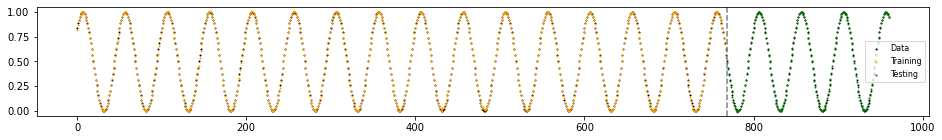

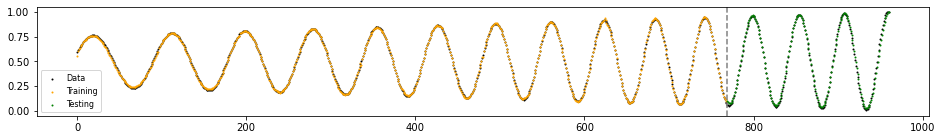

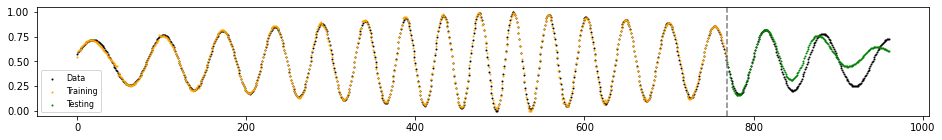

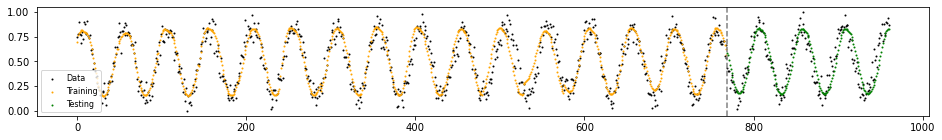

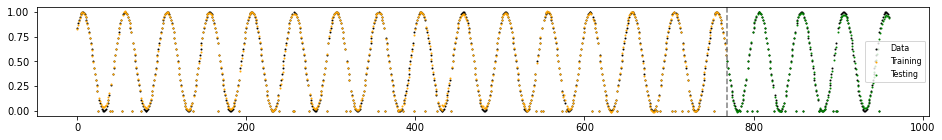

In [5]:
for i in ['1', '2', '3', '4', '5']:
    model_long = tf.keras.models.load_model('saved_model/test' + i + '_model')
    y = np.load('y'+ i +'.npy')
    x = np.arange(totaln)
    x = np.expand_dims(x/totaln,axis = 1)
    if i == '5':
        label = np.load('label5.npy')
        x = np.concatenate((label,x),axis = 1)
    nfeature = y.shape[1]
    ncontrol = x.shape[1]
    history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
    if i == '5':
        is_training = False * np.ones(traintesthistory.shape[0])
        presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
        #Short-term Prediction
        ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                          np.zeros((traintesthistory.shape[0],nfeature)),
                                          is_training, traintestcontrol[:,:,:nfeature]])[0]).reshape((-1,nfeature))
        #plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
        is_training = np.ones((1,1))
        buff = np.zeros(history[initialwindow:initialwindow+1].shape)
        buff[:] = history[initialwindow:initialwindow+1]
        state = np.zeros((1,nfeature))
        presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                                     state, is_training, np.reshape(control[initialwindow:, 0,:nfeature], (1, -1, nfeature))])[0]
        plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
        #is_training = np.ones((1,1))
        #buff = np.zeros(history[:1].shape)
        #buff[:] = history[:1]
        #state = np.zeros((1,nfeature))
        #presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
        #                                             state, is_training, np.reshape(control[:, 0,:nfeature], (1, -1, nfeature))])[0]
        #plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)
    else:
        is_training = False * np.ones(traintesthistory.shape[0])
        presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
        #Short-term Prediction
        ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                          np.zeros((traintesthistory.shape[0],nfeature)),
                                          is_training])[0]).reshape((-1,nfeature))
        #plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
        is_training = np.ones((1,1))
        buff = np.zeros(history[initialwindow:initialwindow+1].shape)
        buff[:] = history[initialwindow:initialwindow+1]
        state = np.zeros((1,nfeature))
        presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                                     state, is_training])[0]
        plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
        #is_training = np.ones((1,1))
        #buff = np.zeros(history[:1].shape)
        #buff[:] = history[:1]
        #state = np.zeros((1,nfeature))
        #presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
        #                                             state, is_training])[0]
        #plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)
    if i == '1':
        obst = np.copy(obs)
        pr = np.copy(presultlong[0])
        pt = np.copy(ptrainlong)
    else:
        obst = np.concatenate((obst, obs), axis = 1)
        pr = np.concatenate((pr, presultlong[0]), axis = 1)
        pt = np.concatenate((pt, ptrainlong), axis = 1)

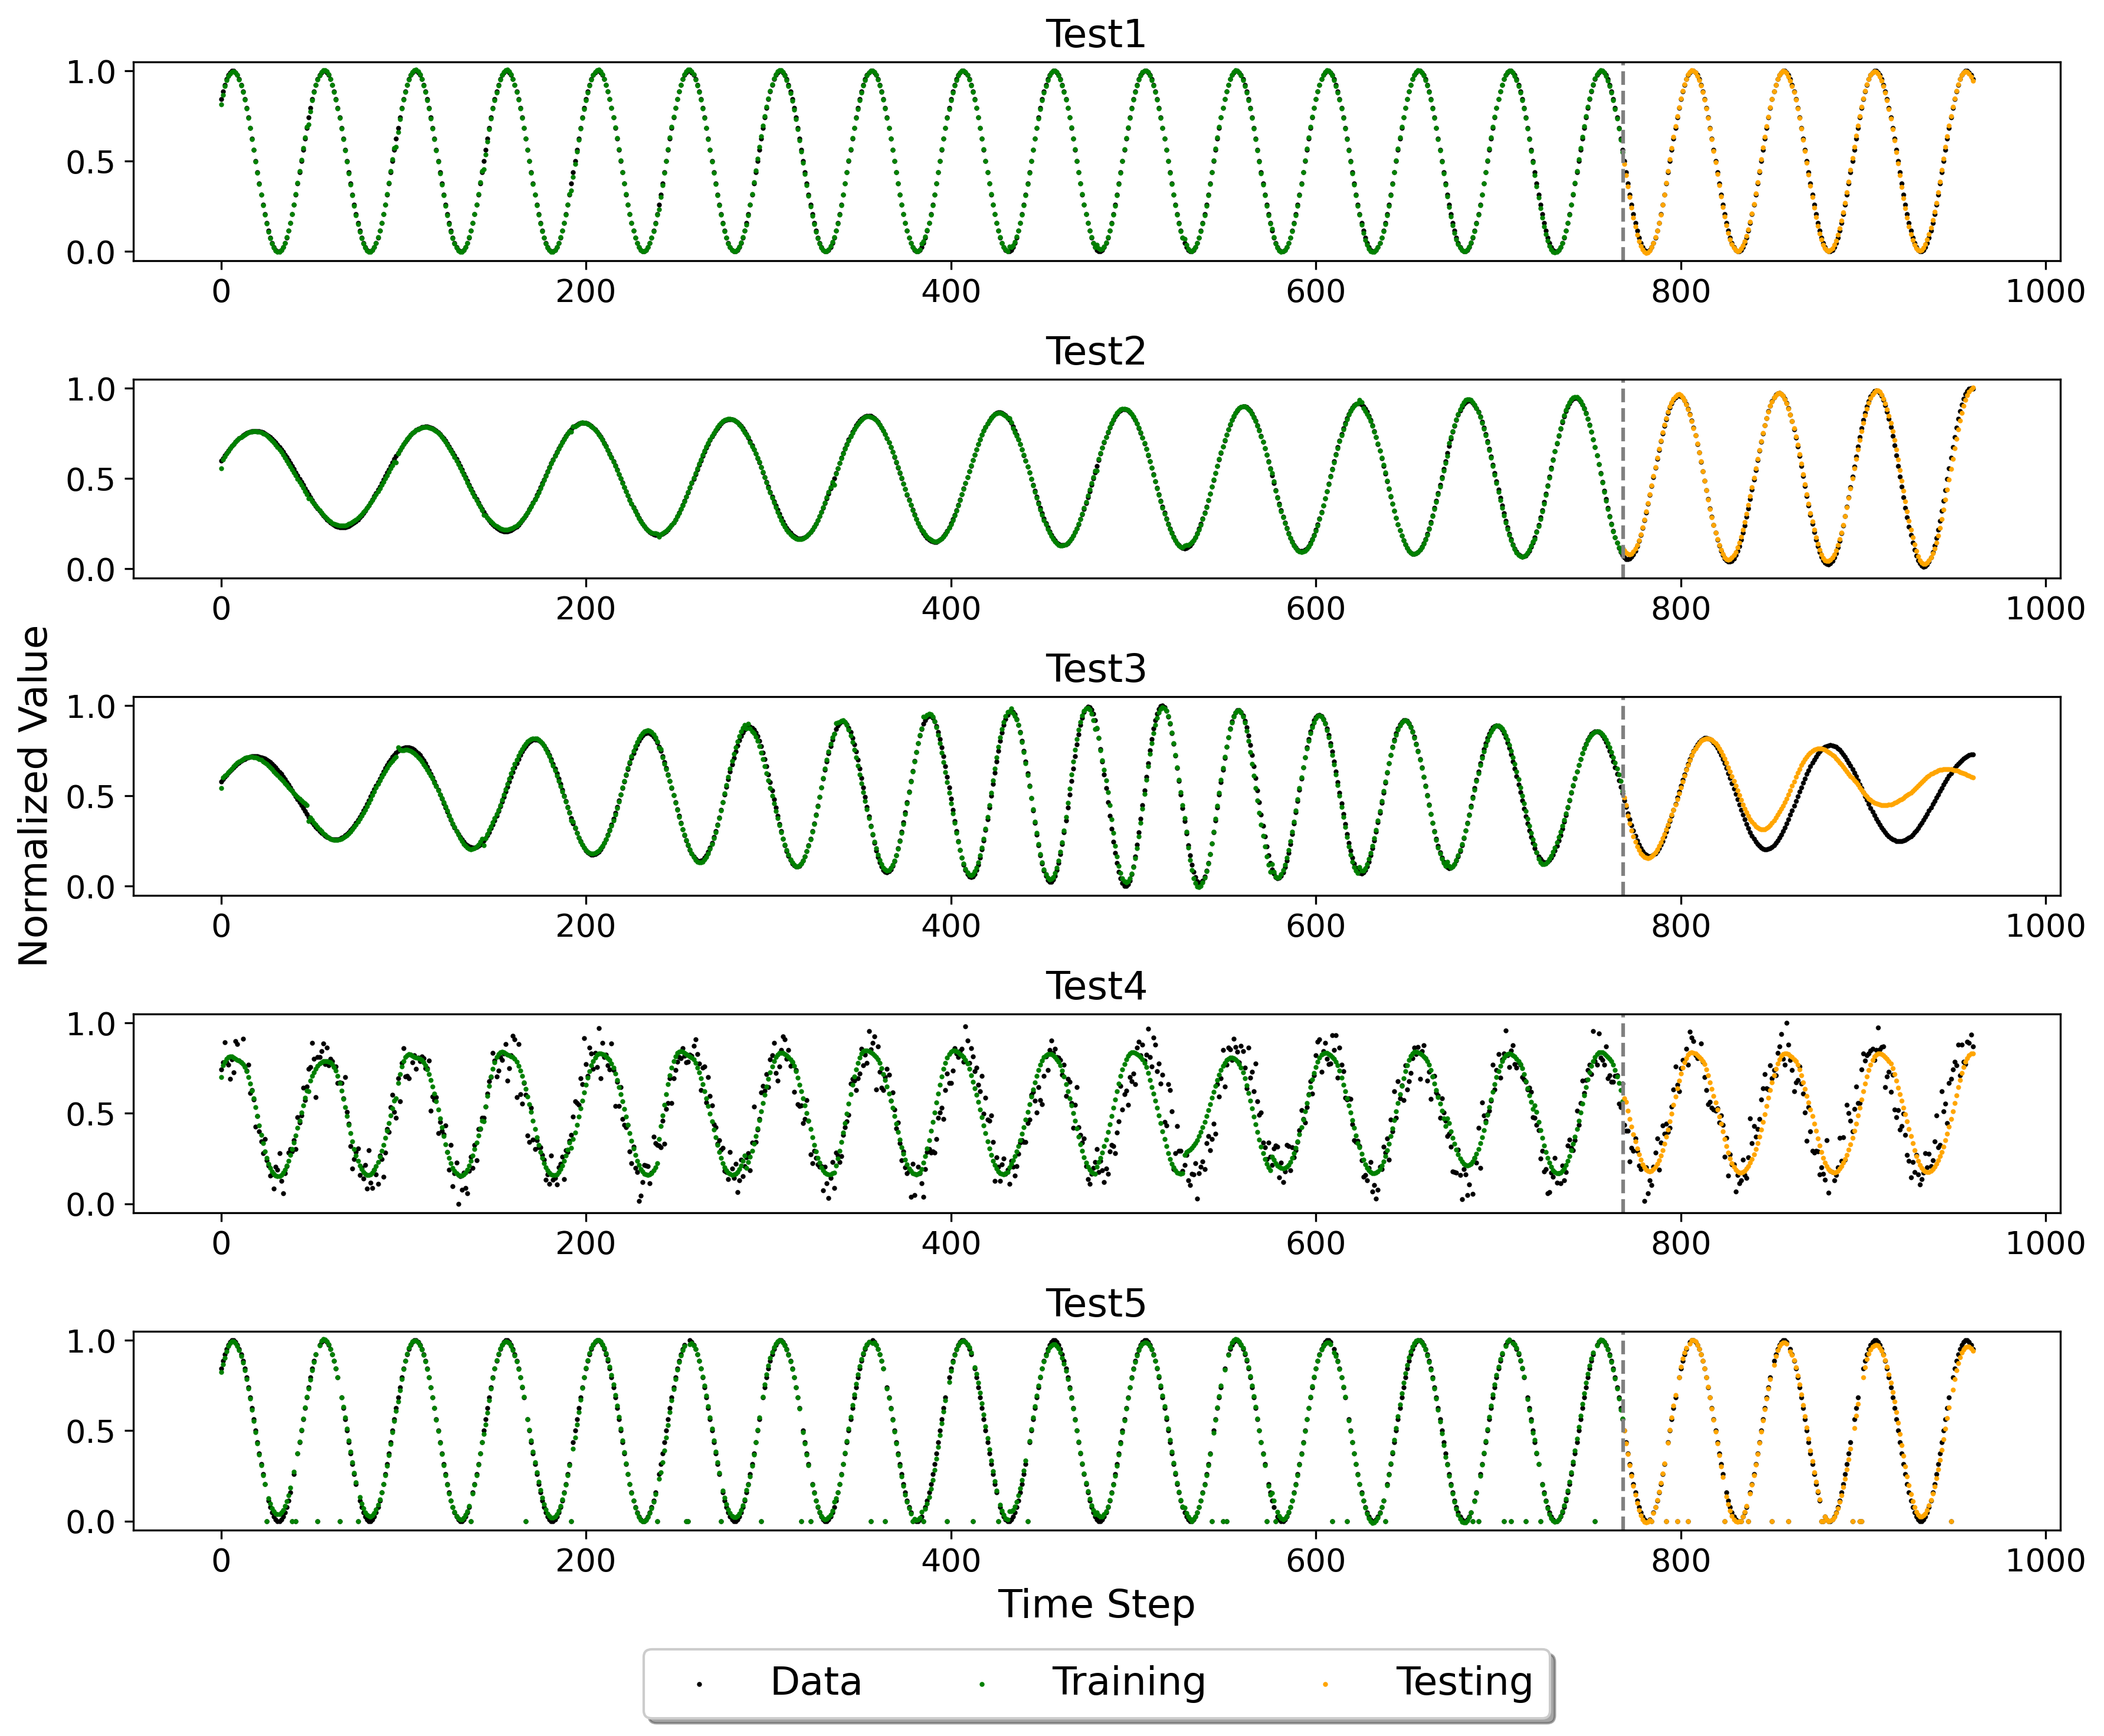

In [39]:
plotpredictionb2(obst, pt, pr, initialwindow, frequency, 5, 1)

In [40]:
#number of datapoints
totaln = 2022
#training epochs
nepochs = 500
#batch size
nbsize = 50
#data frequency
frequency = 1
#validation set 
validsplit = 0
#lookback period
twindow = 6
#predicting horizon
twindow2 = 48
#test series
predictwindow = 1200

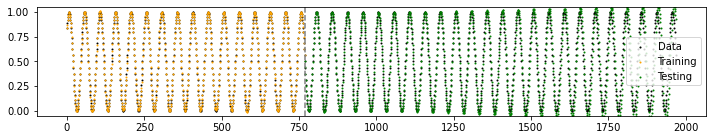

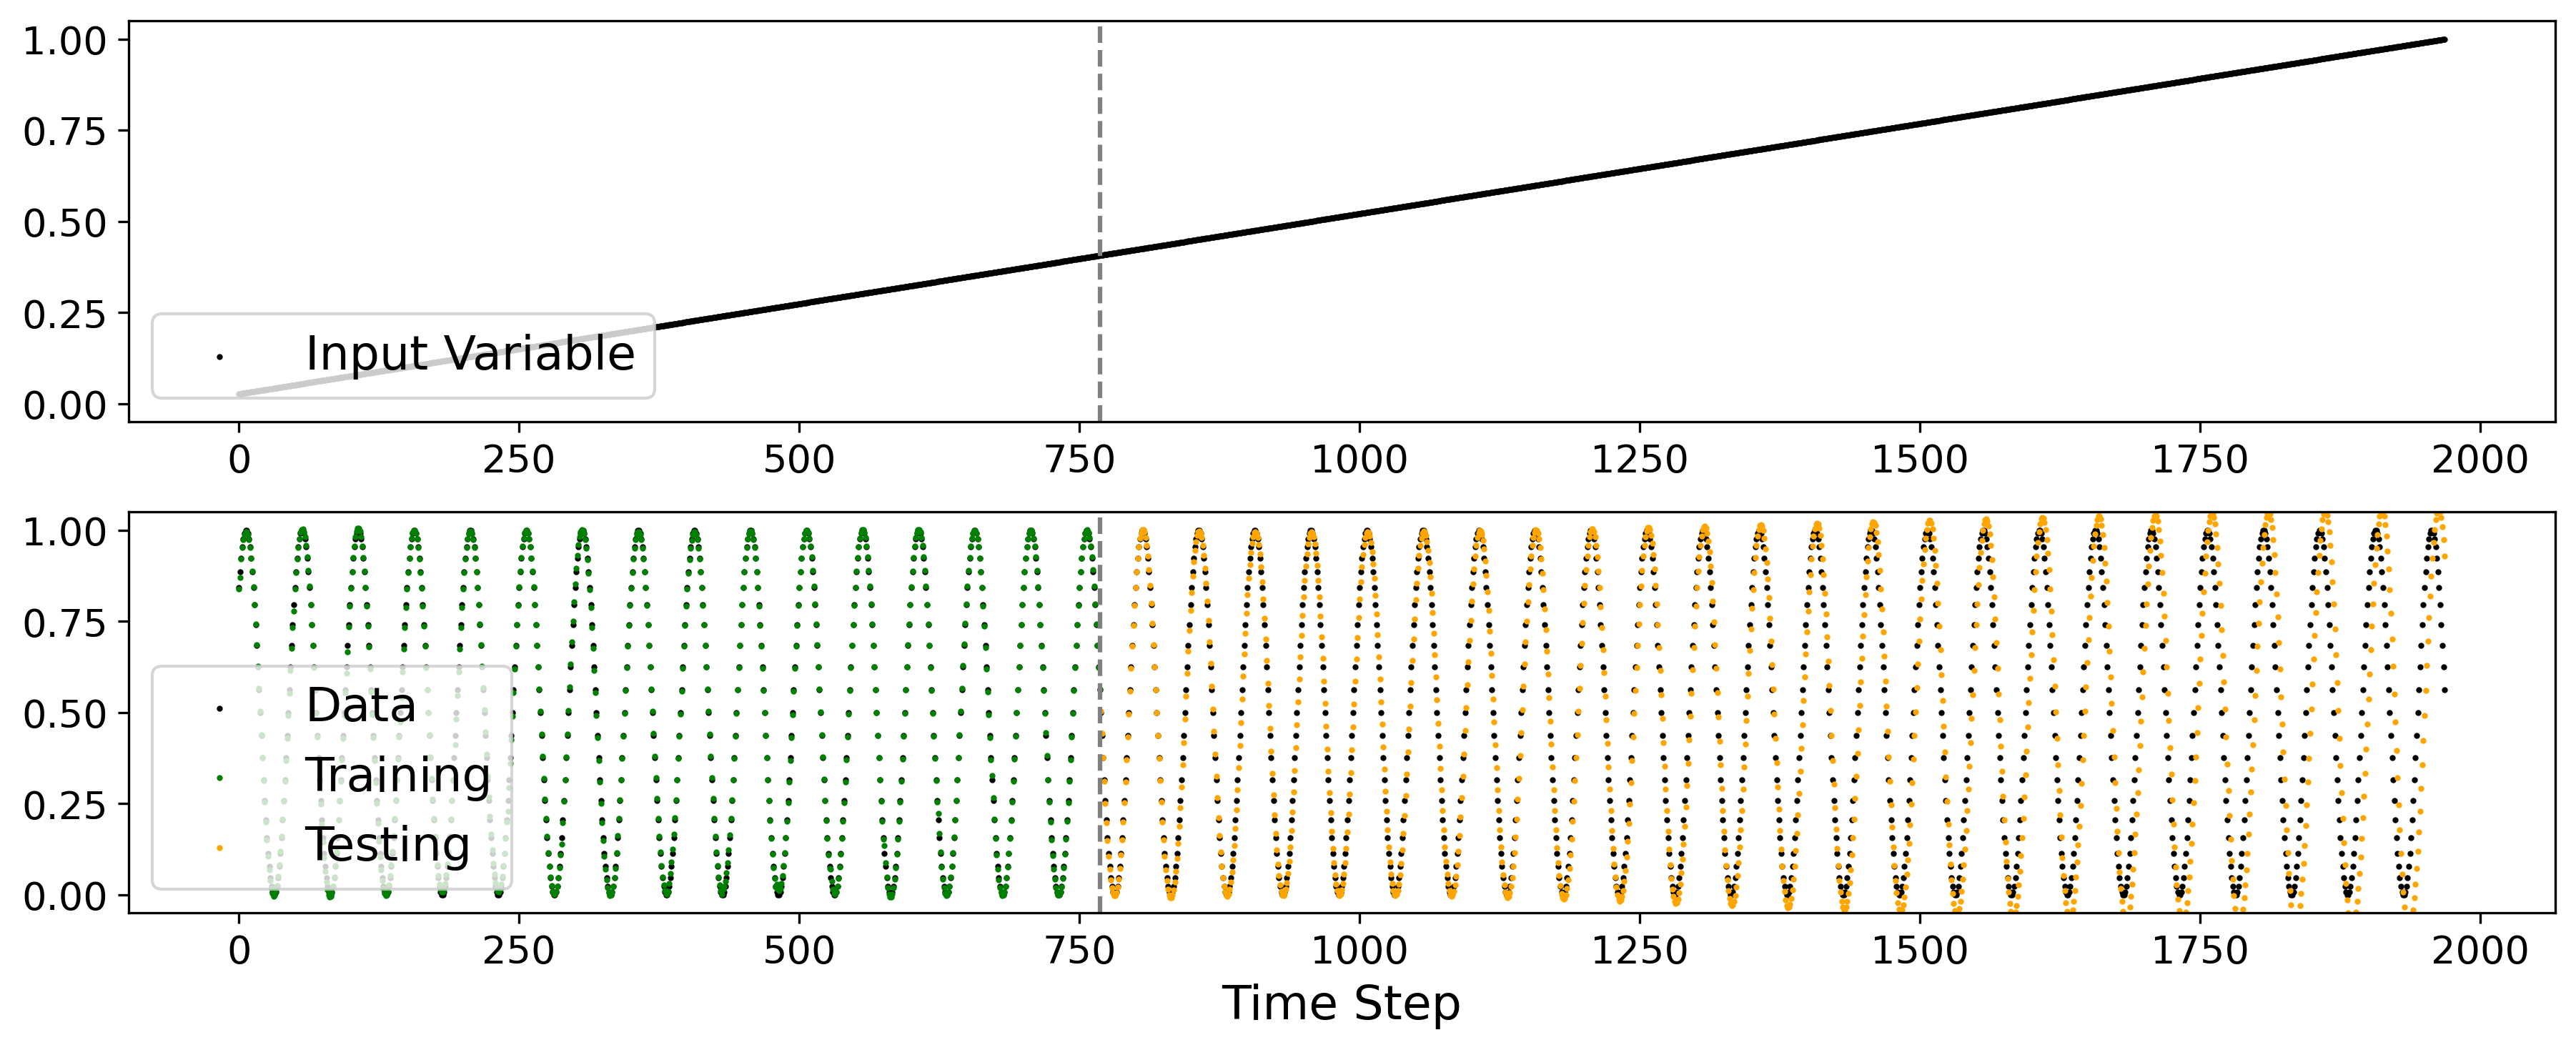

In [45]:
model_long = tf.keras.models.load_model('saved_model/test6_model')
y = np.load('y6.npy')
x = np.arange(totaln)
x = np.expand_dims(x/totaln,axis = 1)
nfeature = y.shape[1]
ncontrol = x.shape[1]
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
#plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
plotxy(obs.reshape((-1,nfeature)), x[-obs.shape[0]:], ptrainlong, presultlong[0], initialwindow, frequency)
#is_training = np.ones((1,1))
#buff = np.zeros(history[:1].shape)
#buff[:] = history[:1]
#state = np.zeros((1,nfeature))
#presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
#                                             state, is_training])[0]
#plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)    

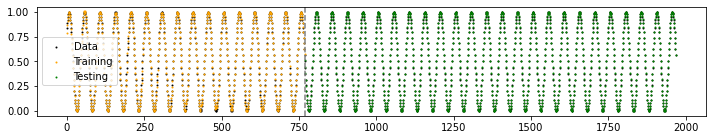

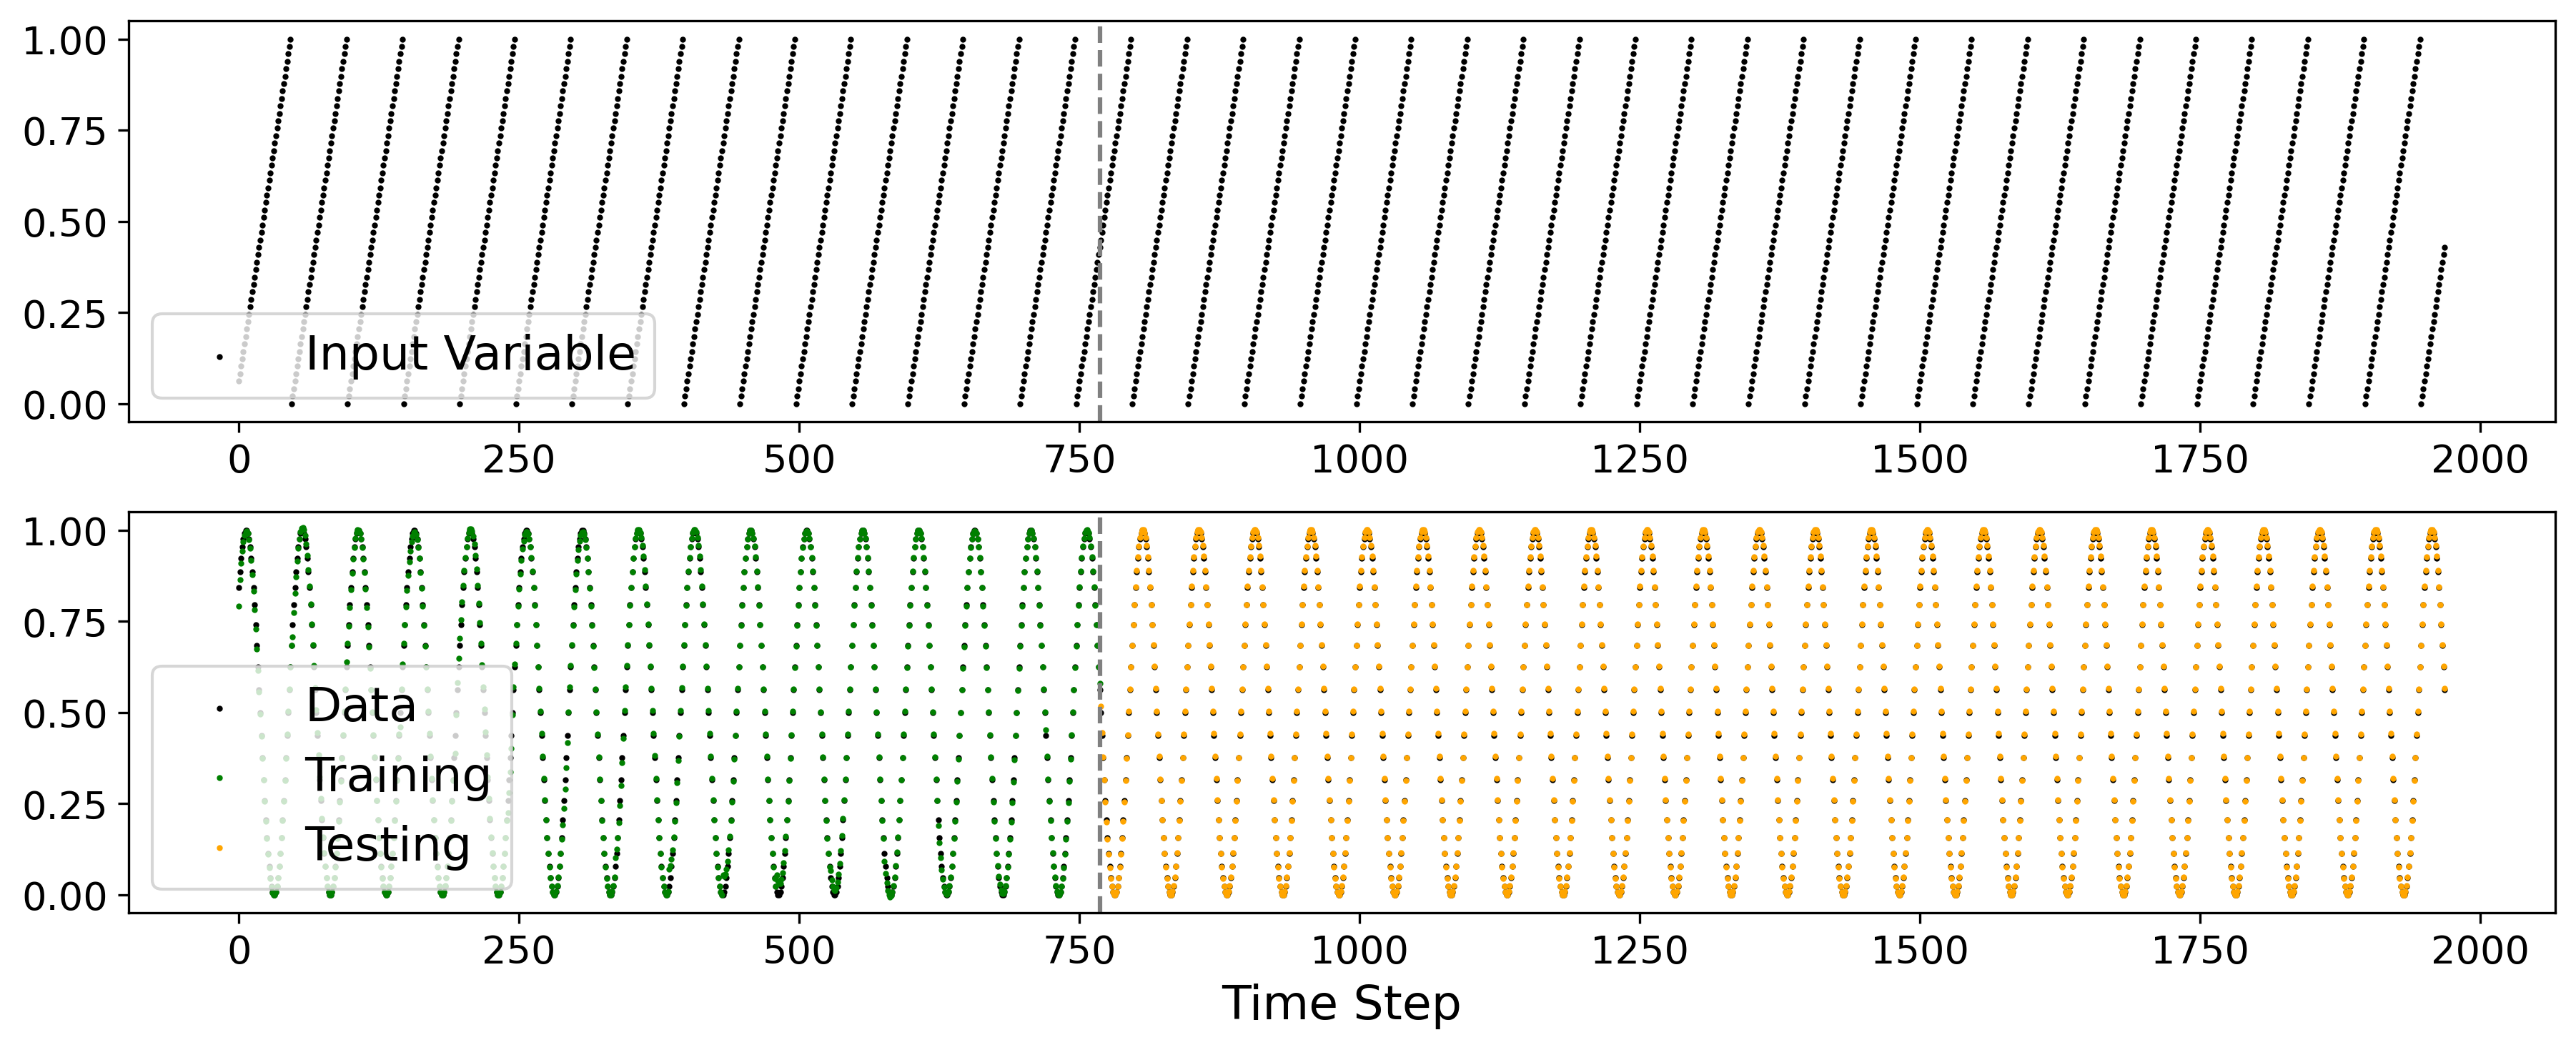

In [46]:
model_long = tf.keras.models.load_model('saved_model/test62_model2')
y = np.load('y6.npy')
x = np.arange(totaln)
x = np.mod(np.expand_dims(x, axis = 1),1/0.02)
maxx = np.max(x)
minx = np.min(x)
x = (x-minx)/(maxx-minx)
nfeature = y.shape[1]
ncontrol = x.shape[1]
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training])[0]).reshape((-1,nfeature))
#plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training])[0]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)
plotxy(obs.reshape((-1,nfeature)), x[-obs.shape[0]:], ptrainlong, presultlong[0], initialwindow, frequency)
#is_training = np.ones((1,1))
#buff = np.zeros(history[:1].shape)
#buff[:] = history[:1]
#state = np.zeros((1,nfeature))
#presultlong = model_long.predict([buff,np.reshape(control[:, 0,:], (1, -1, ncontrol)), 
#                                             state, is_training])[0]
#plotpredictionlong(obs.reshape((-1,nfeature)), presultlong, frequency, 1, 1)   

In [65]:
print(x.shape)

(2022, 1)


In [11]:
#Build CNNRNN model without labeling scheme 
def build_model2(nneck,lr, twindow, twindow2, nfeature, ncontrol):
    inputA = tf.keras.Input(batch_shape=(None, twindow, (nfeature+ncontrol)), name = 'History')
    inputB = tf.keras.Input(batch_shape=(None, None, ncontrol), name = 'Control')
    inputstate = tf.keras.Input(batch_shape=(None, nfeature), name = 'Initial_State')
    is_training = tf.keras.Input(batch_shape=(None, 1), name = 'Is_Training')
    label = tf.keras.Input(batch_shape=(None, None, nfeature), name = 'Label')
    x1 = layers.Conv1D(4,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(inputA)
    #x1b = layers.Conv1D(2,3, activation = 'relu', strides = 1, padding = 'valid', use_bias=False)(x1)
    #x2 = layers.Conv1D(2,3, strides = 2, padding = 'valid', use_bias=False,activation = 'relu')(x1)
    print(x1.shape)
    x2 = layers.Flatten()(x1)
    x2a1 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b1 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2a2 = layers.Dense(nneck, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005))(x2)
    x2b2 = layers.Dense(nfeature, activation = 'relu',use_bias=False,
                        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005),
                        bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.00001,l2=0.00005))(x2)
    z0 = layers.LSTM(nneck, activation = 'relu', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='zeros',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU1')(inputB, initial_state = [x2a1, x2a2])
    
    z01 = layers.LSTM(nfeature, activation = 'linear', use_bias = True, return_state = False, 
                    return_sequences = True, unroll = False, 
                    #kernel_initializer='identity',
                    #recurrent_initializer='identity',
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.000001,l2=0.00005),
                           name = 'GRU2')(z0, initial_state = [x2b1, x2b2])
    z = layers.Multiply()([label, z01])
    #print(z.shape)
    initial_learning_rate = lr
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=300,
        decay_rate=0.95,
        staircase=True)
    model = tf.keras.Model(inputs=[inputA, inputB, inputstate, is_training, label], outputs=[z, z01])
    opt = tf.keras.optimizers.Adam(learning_rate = lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss=['mse', 'mae'],loss_weights=[1, 0], optimizer=opt,metrics=['accuracy'])
    return model

(None, 4, 4)


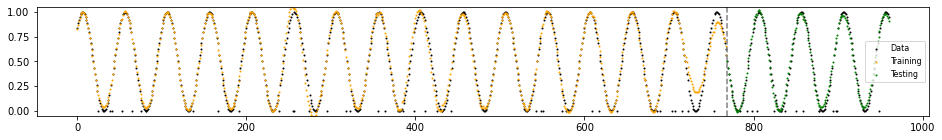

In [16]:
#number of datapoints
totaln = 1014
#training epochs
nepochs = 500
#batch size
nbsize = 50
#data frequency
frequency = 1
#validation set 
validsplit = 0
#lookback period
twindow = 6
#predicting horizon
twindow2 = 48
#test series
predictwindow = 192
#number of feature
nfeature = 1
#number of control
ncontrol = 2
#size of feature vector
nneck = 16
model_long = build_model2(nneck, twindow = twindow, twindow2 = twindow2, nfeature = nfeature, ncontrol = ncontrol, lr = 0.001)
model_long.load_weights('saved_weights/test5_ckpt')
y = np.load('y5.npy')
x = np.arange(totaln)
x = np.expand_dims(x/totaln,axis = 1)

label = np.load('label5.npy')
x = x*label
x = np.concatenate((label,x),axis = 1)
nfeature = y.shape[1]
ncontrol = x.shape[1]
history, control, yout, historyt, controlt, youtt, traintesthistory, traintestcontrol, obs, initialwindow, xin, yin = GenerateSets(x, y, frequency, twindow, twindow2, predictwindow)
is_training = False * np.ones(traintesthistory.shape[0])
presultlong = np.zeros((int((history.shape[0]-initialwindow)/frequency),y.shape[1]))
#Short-term Prediction
ptrainlong = (model_long.predict([traintesthistory,traintestcontrol, 
                                  np.zeros((traintesthistory.shape[0],nfeature)),
                                  is_training, traintestcontrol[:,:,:nfeature]])[1]).reshape((-1,nfeature))
#plotprediction3b(obs.reshape((-1,nfeature)),ptrainlong,initialwindow, frequency, 1,1)
is_training = np.ones((1,1))
buff = np.zeros(history[initialwindow:initialwindow+1].shape)
buff[:] = history[initialwindow:initialwindow+1]
state = np.zeros((1,nfeature))
presultlong = model_long.predict([buff,np.reshape(control[initialwindow:, 0,:], (1, -1, ncontrol)), 
                                             state, is_training, np.reshape(control[initialwindow:, 0,:nfeature], (1, -1, nfeature))])[1]
plotpredictionb(obs.reshape((-1,nfeature)), ptrainlong, presultlong[0], initialwindow, frequency, 1, 1)